In [1]:
# Loading the libraries

suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(Matrix))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(repr))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(ggpubr))

# Setting the seed
set.seed(42)

In [2]:
# RDS file direction

pbmc_Seurat_RDS_direction <- "/home/arsham79/projects/rrg-hsn/arsham79/nsclc/results/pbmc_cell_type_annotated.rds"

In [3]:
# Reading the Seurat object and modify the stage names

pbmc <- readRDS(pbmc_Seurat_RDS_direction)

# Creating the new names for visualizing in the right order
new_tumor_stage <- data.table(new_tumor_stage = c("1. Normal", "2. 0", "3. I", "4. II and III", "4. II and III", "5. IV"),
                              tumor_stage = c("N", "0", "I", "II", "III", "IV"))

old_tumor_stage <- data.table(tumor_stage = pbmc@meta.data$tumor_stage)
new_tumor_stage <- merge(old_tumor_stage, new_tumor_stage, by = "tumor_stage", sort = FALSE)
pbmc@meta.data$new_tumor_stage <- new_tumor_stage$new_tumor_stage

In [4]:
# Creating database

lung_cells <- data.table(names = c("AT type II", "B cells", "Club cells", "Mast cells", "NK cells", "AT type II like cells", "T cells(CD8)", "T cells(CD4)"),
                         IDs = c("pbmc_at_ii", "pbmc_b_cells", "pbmc_club_cells", "pbmc_mast_cells", "nk_cells", "pbmc_at_ii_like", "pbmc_t_cd8", "pbmc_t_cd4"))


# Subsetting the meta data to get barcode, stage, and cell_type

ident_switch_OG <- data.table(brc = rownames(pbmc@meta.data),
                          stage = pbmc@meta.data$new_tumor_stage, # You can change to normal tumor stage or the Alternative one
                          cell_type = pbmc@active.ident)

for(i in 1:nrow(lung_cells)){
    

    # Subsetting the pbmc object
    sub_pbmc <- subset(pbmc, idents = lung_cells[,names][i])
    
    # Using original version
    ident_switch <- ident_switch_OG
    
    # Getting current barcode from subset object
    current_brc <- data.table(brc = rownames(as.matrix(sub_pbmc@active.ident)))
    
    # Merged datatable having only suset barcodes
    ident_switch <- merge(current_brc, ident_switch, by = "brc", sort = FALSE)
    
    # Convert to factor
    new_ident <- factor(ident_switch$stage)
    names(new_ident) <- ident_switch$brc
    
    # Assign the new ident to subseted object
    sub_pbmc@active.ident <- new_ident
    
    # Assign it as a new Seurat object
    assign(x = lung_cells[,IDs][i], value = sub_pbmc)
    
    # log messaging
    print(paste0(lung_cells[,IDs][i], "  has been assigned"))

}

[1] "pbmc_at_ii  has been assigned"
[1] "pbmc_b_cells  has been assigned"
[1] "pbmc_club_cells  has been assigned"
[1] "pbmc_mast_cells  has been assigned"
[1] "nk_cells  has been assigned"
[1] "pbmc_at_ii_like  has been assigned"
[1] "pbmc_t_cd8  has been assigned"
[1] "pbmc_t_cd4  has been assigned"


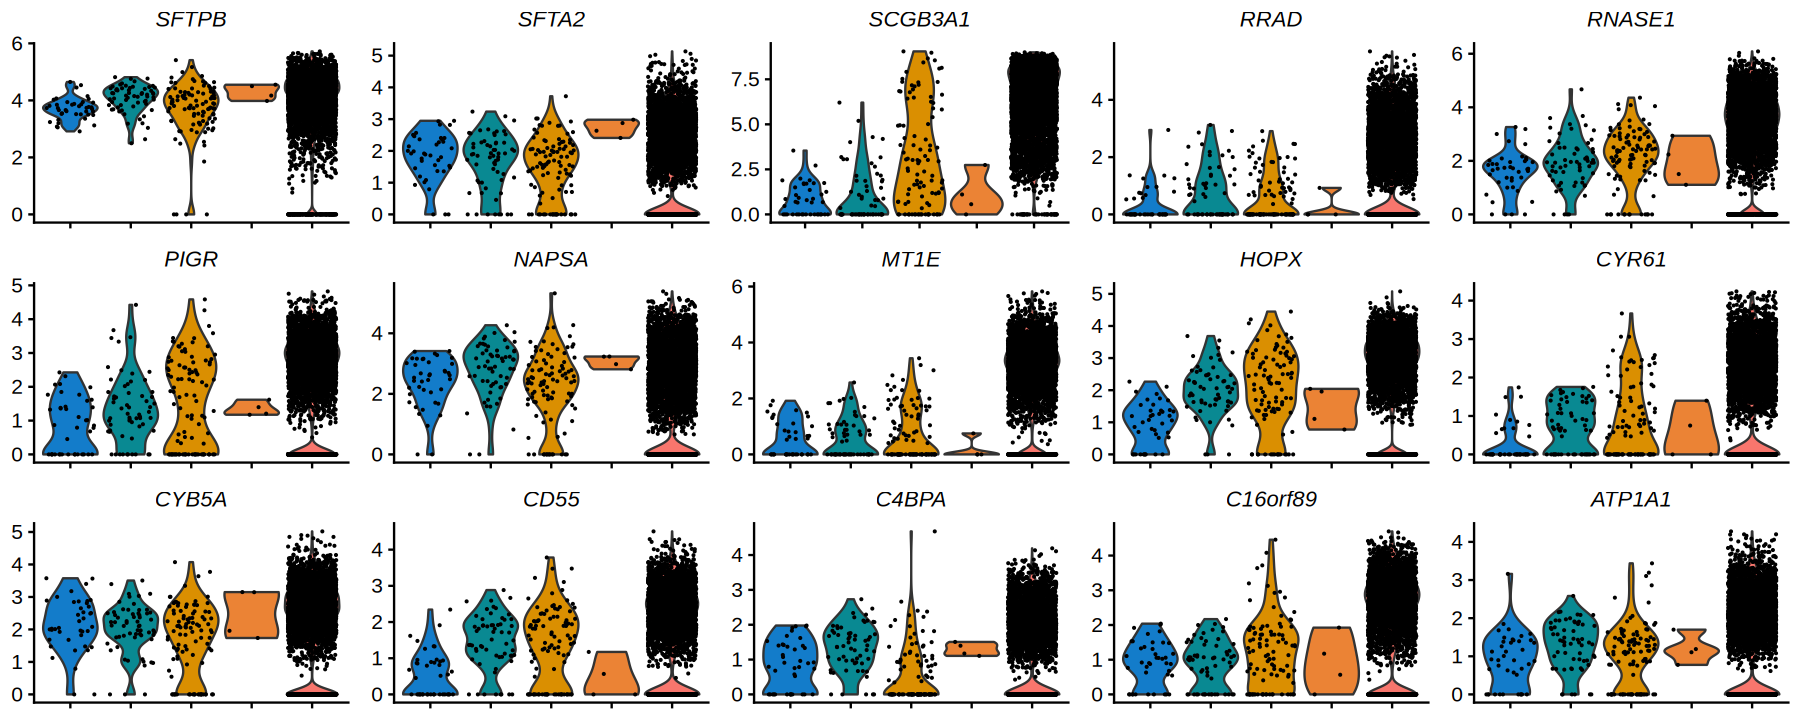

In [5]:
# Adjust plot size
options(repr.plot.width=15, repr.plot.height=6) # Heigth set to 2 for each row
options(warn = -1)

# Define your palette
my_palette <- c("#137CCA", "#098992", "#DA8F01", "#EB8335", "#F8766D")

# Function to generate violin plots
generate_violin_plot <- function(feature) {
  plot <- VlnPlot(object = pbmc_club_cells, features = feature, pt.size = 0.1, log = F) +
    NoLegend() +
    scale_fill_manual(values = my_palette) +
    theme(axis.title.y = element_blank(), axis.title.x = element_blank(), axis.text.x = element_blank(), 
          plot.title = element_text(face = "italic", family = "sans", size = 13))
    
  return(plot)
}

# List of features
features <- c("SFTPB", "SFTA2", "SCGB3A1", "RRAD", "RNASE1",
              "PIGR", "NAPSA", "MT1E", "HOPX", "CYR61", "CYB5A",
              "CD55", "C4BPA", "C16orf89", "ATP1A1")

# Generate violin plots
plots <- lapply(features, generate_violin_plot)

# Combine plots using grid.arrange
grid.arrange(grobs = plots, nrow = 3)

# Turn the warning on again
options(warn = 1)

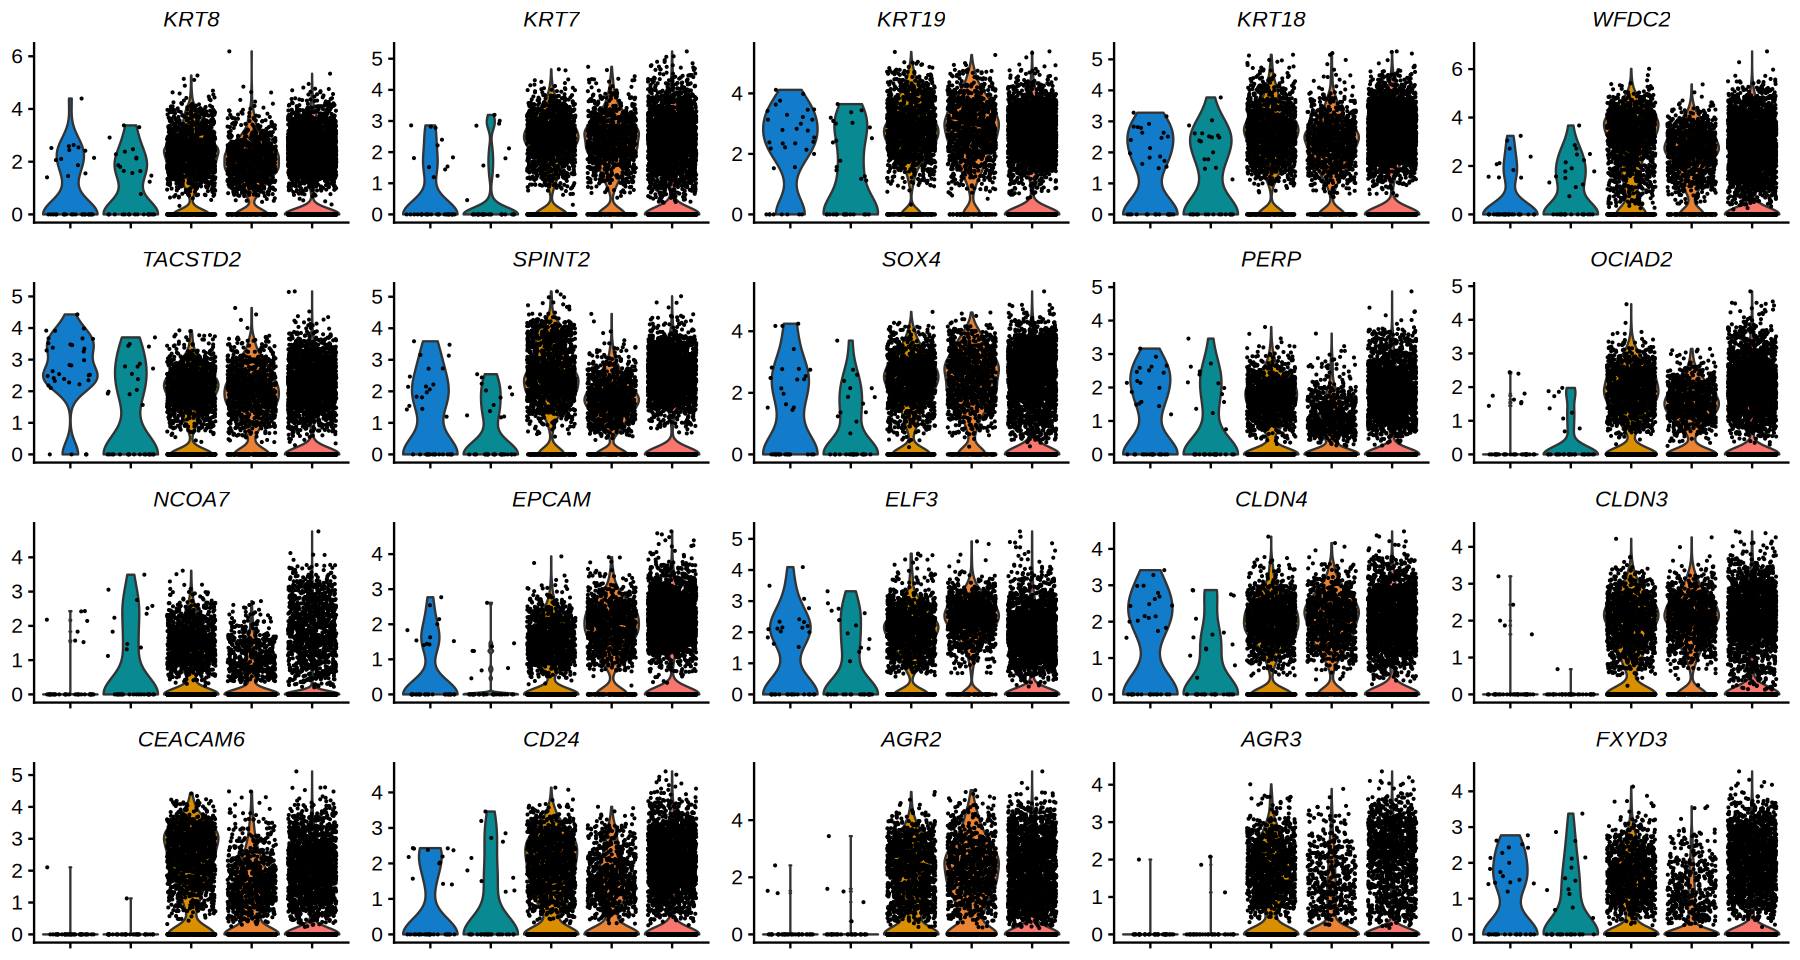

In [6]:
# Adjust plot size
options(repr.plot.width = 15, repr.plot.height = 8) # Heigth set to 2 for each row
options(warn = -1)

# Define your palette
my_palette <- c("#137CCA", "#098992", "#DA8F01", "#EB8335", "#F8766D")

# Function to generate violin plots
generate_violin_plot <- function(feature) {
  plot <- VlnPlot(object = pbmc_at_ii_like, features = feature, pt.size = 0.1, log = F) +
    NoLegend() +
    scale_fill_manual(values = my_palette) +
    theme(axis.title.y = element_blank(), axis.title.x = element_blank(), axis.text.x = element_blank(), 
          plot.title = element_text(face = "italic", family = "sans", size = 13))
    
  return(plot)
}

# List of features
features <- c("KRT8", "KRT7", "KRT19", "KRT18", "WFDC2",
              "TACSTD2", "SPINT2", "SOX4", "PERP", "OCIAD2", 
              "NCOA7", "EPCAM", "ELF3", "CLDN4", "CLDN3",
              "CEACAM6", "CD24", "AGR2", "AGR3", "FXYD3")

# Generate violin plots
plots <- lapply(features, generate_violin_plot)

# Combine plots using grid.arrange
grid.arrange(grobs = plots, nrow = 4)

# Turn the warning on again
options(warn = 1)

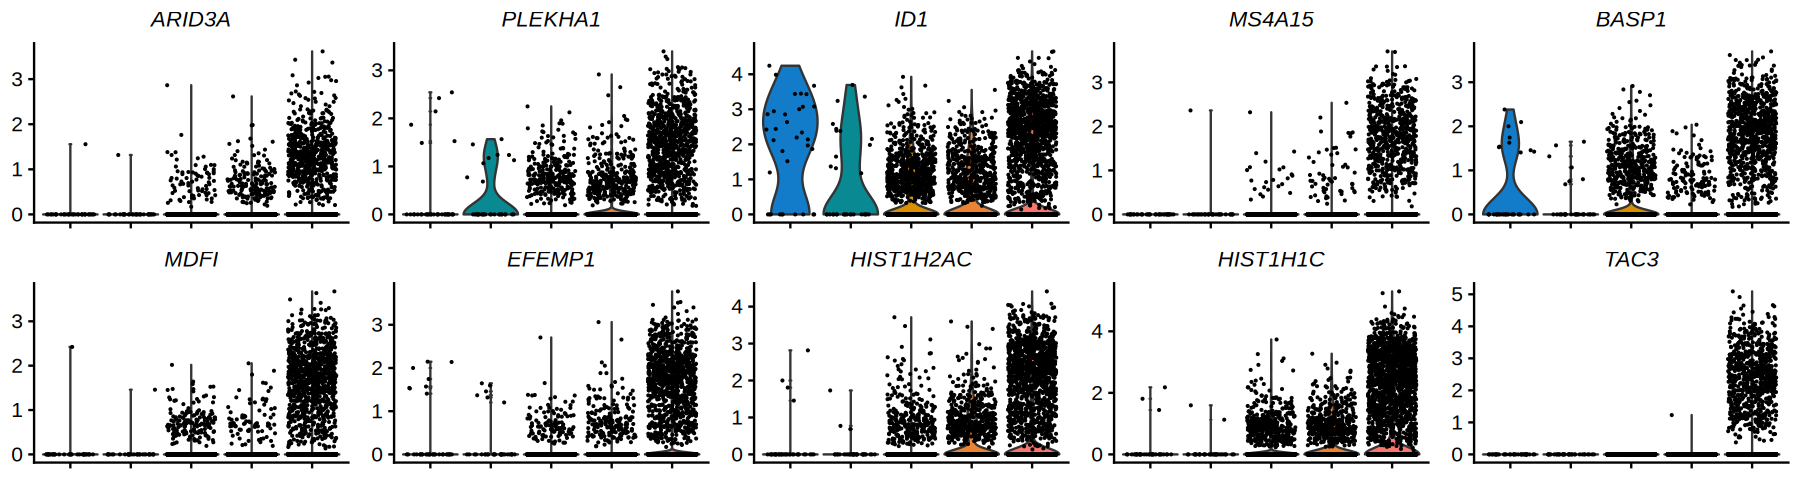

In [7]:
# Adjust plot size
options(repr.plot.width = 15, repr.plot.height = 4) # Heigth set to 2 for each row
options(warn = -1)

# Define your palette
my_palette <- c("#137CCA", "#098992", "#DA8F01", "#EB8335", "#F8766D")

# Function to generate violin plots
generate_violin_plot <- function(feature) {
  plot <- VlnPlot(object = pbmc_at_ii_like, features = feature, pt.size = 0.1, log = F) +
    NoLegend() +
    scale_fill_manual(values = my_palette) +
    theme(axis.title.y = element_blank(), axis.title.x = element_blank(), axis.text.x = element_blank(), 
          plot.title = element_text(face = "italic", family = "sans", size = 13))
    
  return(plot)
}

# List of features
features <- c("ARID3A", "PLEKHA1", "ID1", "MS4A15", "BASP1", 
              "MDFI", "EFEMP1", "HIST1H2AC", "HIST1H1C", "TAC3")

# Generate violin plots
plots <- lapply(features, generate_violin_plot)

# Combine plots using grid.arrange
grid.arrange(grobs = plots, nrow = 2)

# Turn the warning on again
options(warn = 1)